TrueDepthカメラから距離マップをリアルタイム取得

In [1]:
from uikit.ui_uiview import *

# 画面サイズを取得する
size = get_screen_bounds().size
# プレビュー表示用のUIViewを作成する
ui_view = create_uiview(
    rect=CGRect( CGPoint(size.width/4/2, size.height/4/2),
                 CGSize(3*size.width/4,  3*size.height/4) ),
    name='sample',
    color=UIColor.color(red=0,green=0,blue=0,alpha=1) )

In [2]:
import copy

# 色画像・距離画像を入れるリストを用意
video_and_depths = []

# numpyアレイとしてカメラ画像が渡されるとリストに追加する
def process_image(video_and_depth): 
    video_and_depths.append({
        "video":copy.copy(video_and_depth['video']),
        "depth":copy.copy(video_and_depth['depth'])})
    #video_and_depths.append(copy.copy(video_and_depth))

In [4]:
# ビデオ画像のリアルタイム取得を行うためのモジュールを読み込む
from avfoundation.video_capture_ex import *

AVCaptureVideoCaptureEx_=AVCaptureVideoCaptureEx(
    # 取得デバイス
    AVCaptureDeviceTypeBuiltInTrueDepthCamera,
    # カメラ位置
    AVCaptureDevicePositionFront,
    # 取得画像サイズ
    'AVCaptureSessionPreset640x480',
    # 画像色フォーマット
    CV32BGRA,                                    
    # 取得画像を使った処理を行うユーザ関数
    process_image,
    # UIViewへの表示画像を生成するユーザ関数
    None,
    # 取得画像を表示するUIView
    ui_view )

In [5]:
import time

# 撮影開始, 撮影インターバルを秒で指定
AVCaptureVideoCaptureEx_.video_shooting_start(0.1)

time.sleep(2) # 2秒間にわたり撮影を行う

# 撮影を終了する
AVCaptureVideoCaptureEx_.video_shooting_close(ui_view)

processed_frames:22


In [6]:
# 取得した画像の枚数を確認する
l = len(video_and_depths)
print("{:d} images are captured.".format(l))

# 取得した画像の縦・横サイズ
video_h, video_w = video_and_depths[0]['video'].shape 
print("image: height:{:d} pixels x width:{:d} pixels".format(
    video_h, video_w))

# 取得した画像の縦・横サイズ
depth_h, depth_w = video_and_depths[0]['depth'].shape
print("depth: height:{:d} pixels x width:{:d} pixels".format(
    depth_h, depth_w))

15 images are captured.
image: height:640 pixels x width:1920 pixels
depth: height:480 pixels x width:640 pixels


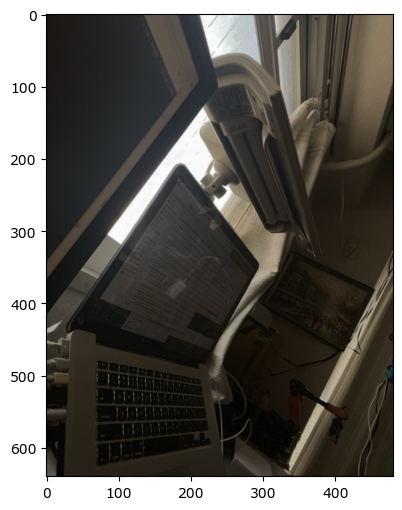

In [7]:
from matplotlib import pylab as plt
import cv2

plt.figure(figsize=[6,6])
# matplotlibを使って色画像を表示する
rgba_image = cv2.cvtColor( 
    video_and_depths[0]['video'].reshape(
        video_h, int(video_w/4), 4), 
    cv2.COLOR_RGBA2BGRA)
plt.imshow(rgba_image)

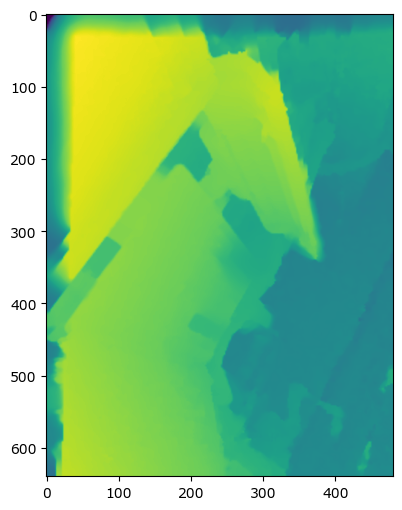

In [8]:
# 高さ画像を表示する
plt.figure(figsize=[6,6])
plt.imshow( np.rot90(np.array(
    video_and_depths[0]['depth'])/255,-1) )

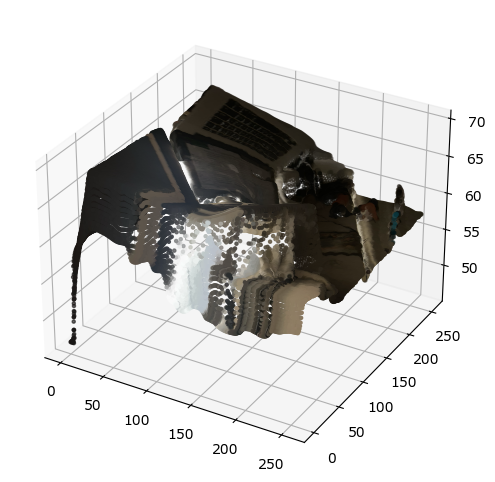

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from itertools import chain
#%matplotlib notebook

l=256
size=(l,l)
# 高さデータを作る
z=np.rot90(np.array(video_and_depths[0]['depth'])/255,-1)
z=cv2.resize(z, size)

# テクスチャ画像も作る
tex = cv2.resize(rgba_image/255, size)[:,:,:3]

x = y = np.linspace(0, l, l)
xx, yy = np.meshgrid(x, y)

fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(np.ravel(xx), np.ravel(yy), np.ravel(z), 
             marker='.',c=np.reshape(tex,(l*l,3))) 
#ax.invert_zaxis()
plt.show()